In [95]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy
import math as m


# Random numbers

Numpy let you generate random numbers. Using the random number generators given as examples, implement the functions below.

In [13]:
np.random.normal()

-0.022480621054556123

In [14]:
mu = 10
variance = 2
np.random.normal(mu, variance, size=(3, ))

array([ 9.28050528,  9.02849548, 11.44746155])

In [15]:
p = 0.8
n = 10
np.random.binomial(n, p), np.random.binomial(1, p) # Binomial(n,p), Bernoulli(p)

(9, 1)

In [16]:
np.random.binomial(1, p, size=(5, ))

array([1, 1, 1, 1, 1])

In [17]:
from scipy import linalg

def generate_wishart(n, covariance, k=1):

    p = np.eye(3).shape[0]
    Y = [np.random.multivariate_normal(np.zeros(p), covariance, size = n) for i in range(k)]
    X = [np.matmul(y.T, y) for y in Y]
    return X
    """
    Return k Wishart matrices with degrees of freedom n
    and given covariance.
    
    Parameters
    ----------
    n: int
        degrees of freedom
    covariance: np array of shape (p, p)
        covariance matrix
    k: int or None (optional)
        number of wishart matrices to return
    
    Return
    ------
    W: np array of shape (k, p, p)
        k Wishart matrices
    """    
generate_wishart(5, np.eye(3), 3)

[array([[ 3.04133182, -0.7618349 , -2.09535178],
        [-0.7618349 ,  3.31089133, -0.61026798],
        [-2.09535178, -0.61026798,  3.42569592]]),
 array([[10.59244253, -3.97024679,  5.86676138],
        [-3.97024679,  5.21469601, -2.65869232],
        [ 5.86676138, -2.65869232,  5.70905089]]),
 array([[10.26221634,  0.30680997,  0.84552063],
        [ 0.30680997,  9.68695397, -2.95650254],
        [ 0.84552063, -2.95650254,  6.40178509]])]

In [18]:
np.random.choice(6) + 1 # roll a die

5

In [19]:
1 + np.random.choice(6, p =[1/6, 1/6, 1/6, 1/6, 1/6, 1/6], size=(10, ))  # roll a die 10 times

array([3, 5, 2, 3, 4, 6, 2, 3, 4, 1])

In [20]:
# roll a biased die 10 times
1 + np.random.choice(6, p =[1/10, 1/10, 1/10, 1/10, 1/10, 1/2], size=(10, )) 

array([3, 6, 3, 5, 6, 6, 1, 3, 6, 6])

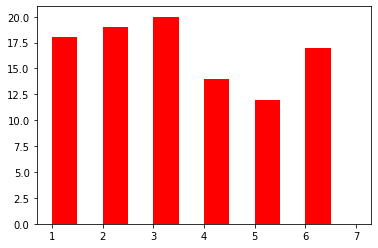

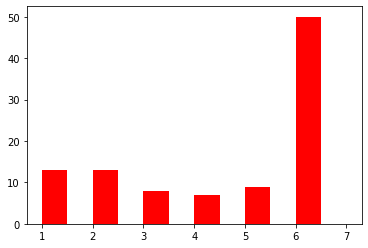

In [21]:
def biased_die_histogram(p1, k):
    assert len(p1)==6, "Il faut que la taille de p soit égale à 6"
    results = 1 + np.random.choice(6, p =p1, size=k) 
    plt.hist(results, bins  = [1,2,3,4,5,6,7], color = "red", width=0.5, align='mid')
    plt.show()
    """
    Draw a biased die with probabilities p, k times, and plot the resulting histograms.
    There should be six bars.
    
    Parameters
    ----------
    p : np array of shape (6,)
        The probabilities associated with each outcome of the dice.
    k: int
        Number of rolls
    """
biased_die_histogram([1/6, 1/6, 1/6, 1/6, 1/6, 1/6], 100)
biased_die_histogram([1/10, 1/10, 1/10, 1/10, 1/10, 1/2], 100)

# SVD, Pseudo-Inverse in numpy

Generate a random matrix A of size (3, 6) with iid N(0,1) entries, and verify that the singular values squared are the eigenvalues of the matrix $A^TA$.

Verify that the pseudo-inverse computed by ``np.linalg.pinv`` is the same as the pseudo-inverse computed from its definition using the SVD.

In [22]:
def test_singular_values_eigenvalues():
    """Test that the square of the singular values of X gives the eigenvalue of X^T.dot(X)
    """
    A = np.random.normal(0, 1, size = (3,6))
    U,S,V = np.linalg.svd(A)
    eig_vals_A_AT = np.sqrt(np.linalg.eigvals(np.matmul(A,A.T)))
    eig_vals_A_AT = np.sort(eig_vals_A_AT)[::-1] #Sorting them in descending order
    print("Mêmes valeurs propores ? : ", np.min(np.isclose(S, eig_vals_A_AT)))

test_singular_values_eigenvalues()

def test_pinv():
    """Test that computing the pseudo inverse with pinv or via svd gives the same result
    """
    A = np.random.normal(0, 1, size = (3,6))
    U,S,V = np.linalg.svd(A, full_matrices=False)
    diagonal = np.zeros((S.shape[0], S.shape[0]))
    inverse_svd = np.matmul(V.T, np.matmul(np.diag(1/S), U.T))
    print("Même inverse ? : ", np.min(np.isclose(inverse_svd, np.linalg.pinv(A))))

test_pinv()

Mêmes valeurs propores ? :  True
Même inverse ? :  True


# Boxplots

Using matplotlib, for each $\theta = 1,2,...20$, generate 100 independent copies of a random variable with $N(\theta, \theta^{-1})$ distribution. Plot the generated random variables with boxplots, one boxplot for each value of $\theta$ and the x-axis representing $\theta$.

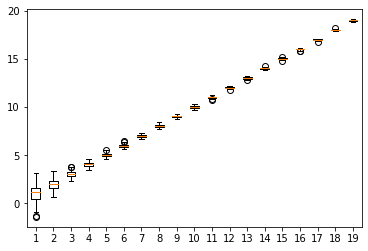

In [27]:
def plot_boxplot_normal_increasing_mean_and_variance():
    """Using matplotlib, for each theta = 1,2,...,20, 
    generate 100 independent copies of a random variable 
    with N(theta, theta^{-1}) distribution. 
    Plot the generated random variables with boxplots, 
    one boxplot for each value of theta and 
    the x-axis representing theta.
    """
    data = [list() for i in range(1, 20)]
    for theta in range(1,20):
      for i in range(100):
        N = np.random.normal(theta, 1/theta)
        data[theta-1].append(N)
    plt.boxplot(data)

plot_boxplot_normal_increasing_mean_and_variance()

# Quantile quantile plots

In order to check visually that a collection of random variables follow a certain distribution, quantile quantile plots are convenient.

In [24]:
n = 10
X = np.random.randint(1000, size=n) # generate n numbers
X_sort = np.sort(X) # sort them
scores  = np.arange(1, n + 1) / (n+1) # their corresponding scores (many other methods are possible)

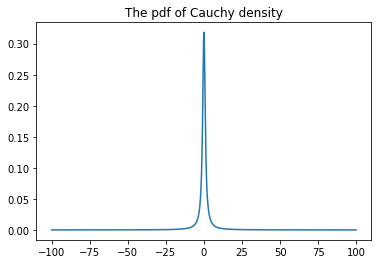

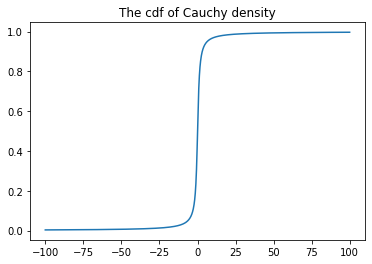

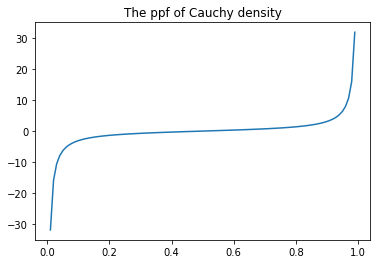

20%, 50% and 60% quantiles: [-1.37638192  0.          0.3249197 ]


In [25]:
# Getting theoretical quantities on distributions
cauchy = scipy.stats.cauchy # many others are available
# the probability density function
X = np.arange(-100, 100, 0.1)
plt.figure()
plt.title("The pdf of Cauchy density")
plt.plot(X, cauchy.pdf(X))
plt.show()
# the cumulative distribution function
X = np.arange(-100, 100, 0.1)
plt.figure()
plt.title("The cdf of Cauchy density")
plt.plot(X, cauchy.cdf(X))
plt.show()
# the percent point function (inverse of cdf)
X = np.arange(0, 1, 0.01)
plt.figure()
plt.title("The ppf of Cauchy density")
plt.plot(X, cauchy.ppf(X))
plt.show()
# Theoretical 20%, 50% and 60% quantiles of cauchy distribution
quantiles = cauchy.ppf((0.2, 0.5, 0.6))
print("20%, 50% and 60% quantiles:", quantiles)

1. Generate 100 independent copies of N(1,3) random variables and plot the QQ-plot
against the theoretical quantiles of the N(0,1), N(5, 3) and N(1,3) distribution. Superpose on the plot the line y=x.

2. Generate 100 independent copies of chi-square random variables with 5 degrees of freedom,
and compare those aginst the theoretical quantiles of the N(5,1) distribution, the $\chi^2_4$ distribution, the $\chi^2_5$ distribution, the $\chi^2_6$ distribution.Superpose on the plot the line y=x.

In [26]:
def qqplot(data, distribution):
    """
    Generate a qqplot using the quantiles of the data and the theoretical data of the distribution.
    Superpose on the plot the line y=x.
    
    Parameters
    ----------
    data: np array of shape (100,)
        Empirical data
    
    distribution: distribution from scipy.stats
        Theoretical distribution to compare to
    """
    raise NotImplementedError
    
def test_qqplot_sm():
    """
    Test the plot is the same as in sm.qqplot
    """
    X = np.random.normal(0, 1, size=100)
    qqplot(X, scipy.stats.norm)
    sm.qqplot(X, line='45')
    
test_qqplot_sm()

NotImplementedError: ignored

In [ ]:
raise NotImplementedError
# Answer 1.

In [ ]:
# Answer 2.
raise NotImplementedError

# Generate a simple regression model

Given the sample size n and dimension p, generate a dataset (y, X) where y has size n and X has size n times p,
such that
$y = X \beta^* + \beta_0^* + \epsilon$ where $\epsilon$ has iid $N(0,\sigma^2)$ entries, $X$ has iid $N(0,1)$ entries, and $\beta^*\in R^p$ has norm equal to the signal strength parameter, and $\beta_0^*$ is the intercept.

In [32]:
def linear_regression(X, beta_true, sigma):
    """
    Applies the linear regression model
    
    Parameters
    -----------
    
    X: np array of shape (n, p)
    input features

    beta_true: np array of shape (p)
    true coefficients
    
    sigma: float
    noise standard deviation 

    Return
    ------
    y: np array of shape (n,)
    responses generated accroding to the linear regression model
    y= X beta_star + eps
    """
    raise np.matmul(X,b_true)+np.random.normal(0, sigma**2, size = (n))

def generate_dataset(n, p, sigma=0.7, signal_strength=2):

    X = np.random.normal(0, 1, size = (n,p))
    b_true = np.random.uniform(0, 1, size = (p))
    b_true = (b_true / np.linalg.norm(b_true))*signal_strength
    eps = np.random.normal(0, sigma**2, size = (n))
    y = np.matmul(X,b_true)+eps

    """
    Generate a data set (with intercept = 0)
    Take beta_star uniformly in the sphere of length: signal_strength
    Parameters
    ----------
    n: int
        number of samples
    p: int
        dimension
    sigma: float
        noise standard deviation
    signal_strength: float
        norm of the true parameter b_true
    
    Return
    X: np array of shape (n, p)
        Features
    y: np array of shape (n,)
        Target
    b_true: np array of shape (p,)
    """
    return X, y, b_true

def test_nointercept():
    """
    Check that X.dot(b_true) = y when the noise is 0
    """
    X, y, b_true = generate_dataset(100, 10, sigma=0, signal_strength=1)
    np.testing.assert_allclose(X.dot(b_true), y)
    
test_nointercept()

def generate_dataset_with_intercept(n, p, sigma=0.7, signal_strength=2):
    """
    Generate a data set, same as before, but here the returned array X should have
    p+1 columns, and the first column contains only 1,1,...,1 to account for
    possible intercept.
    Parameters
    ----------
    n: int
        number of samples
    p: int
        dimension
    sigma: float
        noise standard deviation
    signal_strength: float
        norm of the true parameter b_true
    
    Return
    X: np array of shape (n, p + 1)
        Features, last column contains only ones
    y: np array of shape (n,)
        Target
    b_true: np array of shape (p,)
        true coefficients (last one is the intercept)
    """
    X = np.ones((n,p+1))
    X[:,:-1] = np.random.normal(0,1,size = (n,p))
    b_true = np.ones((p+1))
    b_true[:-1] = np.random.uniform(0, 1, size = (p))
    b_true[:-1] = (b_true[:-1] / np.linalg.norm(b_true[:-1]))*signal_strength
    eps = np.random.normal(0, sigma**2, size = (n))
    y = np.matmul(X,b_true)+eps
    return X, y, b_true

def test_intercept():
    """
    Check that X.dot(b_true) = y when the noise is 0 and intercept = 0
    """
    X, y, b_true = generate_dataset_with_intercept(100, 10, sigma=0, signal_strength=1)
    np.testing.assert_allclose(X[:, :-1].dot(b_true[:-1]) + b_true[-1], y)
    
test_nointercept()
test_intercept()

# Least-squares

Given a design matrix X and response y,
implement the least-squares estimate $\hat\beta = (X^TX)^\dagger X^Ty$
using several methods:

1. using the SVD of X `np.linalg.svd`
2. using the pseudo-inverse of X `np.linalg.pinv`
3. using the inverse of $X^TX$ if full-rank, and its pseudo-inverse otherwise
4. using `scipy.linalg.lstsq`

For $p=10, n=20$, generate a dataset using the previous functions and verify that all methods give the correct estimate of $\beta$ when there is no noise.

For $p=10, n=20$, generate a dataset using the previous functions and verify that all methods give the same estimate.


In [69]:
def compute_least_squares_using_SVD(X, y):
    U, S, Vt = np.linalg.svd(X, full_matrices = False)
    VinvSUt = np.matmul(np.matmul(Vt.T, np.diag(1/S)), U.T)
    return np.matmul(VinvSUt, y)
    
def compute_least_squares_using_pseudo_inverse(X, y):
    return np.dot(np.linalg.pinv(X), y)
    
def compute_least_squares_using_method3(X, y):
    return np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

def compute_least_squares_using_scipy(X, y):
    return scipy.linalg.lstsq(X, y)[0]
    
def test_lsqr():
    n = 20
    p = 10
    X, y, b_true = generate_dataset_with_intercept(n, p, sigma=0, signal_strength=2)

    b_hat = compute_least_squares_using_SVD(X, y)
    print("Méthode 1: Le resultat est-il correct? ", np.min(np.isclose(b_true, b_hat)))

    b_hat = compute_least_squares_using_pseudo_inverse(X, y)
    print("Méthode 2: Le resultat est-il correct? ", np.min(np.isclose(b_true, b_hat)))

    b_hat = compute_least_squares_using_method3(X, y)
    print("Méthode 3: Le resultat est-il correct? ", np.min(np.isclose(b_true, b_hat)))

    b_hat = compute_least_squares_using_scipy(X, y)
    print("Méthode 4: Le resultat est-il correct? ", np.min(np.isclose(b_true, b_hat)))
    
    """Test that all methods yield the correct beta when there is no noise
    """
    

def test_same_estimate():
    """ Test that all methods yield the same estimate of beta
    """

    flag = True 
    n = 20
    p = 10
    X, y, b_true = generate_dataset_with_intercept(n, p, sigma=0, signal_strength=2)

    b_hat1 = compute_least_squares_using_SVD(X, y)
    b_hat2 = compute_least_squares_using_pseudo_inverse(X, y)
    b_hat3 = compute_least_squares_using_method3(X, y)
    b_hat4 = compute_least_squares_using_scipy(X, y)

    flag = np.min(np.isclose(b_hat1, b_hat2))
    flag = np.min(np.isclose(b_hat1, b_hat3))
    flag = np.min(np.isclose(b_hat1, b_hat4))

    print("Le même β est-il retourné? :", flag)

        
test_lsqr()
test_same_estimate()

Méthode 1: Le resultat est-il correct?  True
Méthode 2: Le resultat est-il correct?  True
Méthode 3: Le resultat est-il correct?  True
Méthode 4: Le resultat est-il correct?  True
Le même β est-il retourné? : True


# The distribution of the MLE, the residuals, and the loss

By computing 100 independent datasets with $p=10, n=30$, verify with histograms and
QQ-plots that the squared norm $\|y-X\hat\beta\|^2/\sigma^2$ has chi square distribution, and recall its degrees of freedom.

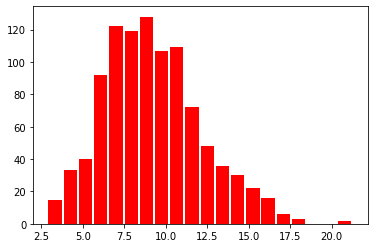

In [90]:
def error_residual_plot():
    p = 10
    n = 30
    sigma=0.7
    data = list()
    for i in range(1000):
      X, y, b_true = generate_dataset_with_intercept(n, p, sigma, signal_strength=2)
      b_hat = compute_least_squares_using_SVD(X, y)
      data.append(np.linalg.norm(y - np.dot(X, b_hat))**2 / sigma**2)
    plt.hist(data, 20, color = "red", width=0.8, align='mid')
    
error_residual_plot()


# The curve of the risk of the MLE in high dimension

1. Fix $n=200$, noise level $\sigma^2=0.7$, signal strength $2$, and a grid of values for $p/n$, say $0.1, 0.2, 0.3, 0.4, ..., 2.9, 3.0$. For each for of $n, p$, generate $10$ independent datasets and plot the boxplots corresponding the squared error $\|\hat\beta - \beta^*\|^2$ for each given ratio $p/n$. If $p>n$, make sure that $\hat\beta$ is the solution $(X^TX)^\dagger X^Ty$. Plot the corresponding theoretical curves for the expected squared error found using the formula for expected inverse Wishart matrices.

2. Bonus: Plot also the boxplots for the the bias and variance of the squared error. 

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


{'boxes': [<matplotlib.lines.Line2D at 0x7f01f32e5310>,
 'caps': [<matplotlib.lines.Line2D at 0x7f01f339bb50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f01f3378b90>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f01f3378650>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f01f32f4bd0>,
  <matplotlib.lines.Line2D at 0x7f01f3644f50>]}

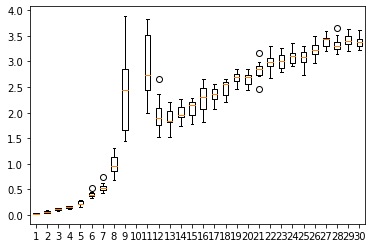

In [100]:
# Question 1
n = 200
sigma = m.sqrt(0.7)
signal_strength = 2
p_values = [int(0.1*i*n) for i in range(1,31)]
data = [list() for p in p_values]

for k in range(len(p_values)):
  for i in range(10):
    if (p_values[k]/n == 1):
      continue
    X, y, b_true = generate_dataset_with_intercept(n, p_values[k], sigma**2, signal_strength)
    b_hat = compute_least_squares_using_SVD(X, y)
    data[k].append(np.linalg.norm(b_hat - b_true)**2)
plt.boxplot(data)
# Question 2
